In [1]:
import numpy as np

v = np.linspace(-150, 60, 1000)

#na3 
na3_minf  = 1 / ( 1 + np.exp( ( - v - 38.43 ) / 7.2 ) )
na3_hinf  = 1 / ( 1 + np.exp( (   v + 50 ) / 4 ) )
#nap 
nap_minf  = 1 / ( 1 + np.exp( ( - v - 48 ) / 5 ) )
#kdr 
kdr_ninf  = 1 / ( 1 + np.exp( ( - v + 13 ) / 8.738 ) )
#im
im_inf    = 1 / ( 1 + np.exp( ( - v - 52.7 ) / 10.34 ) )


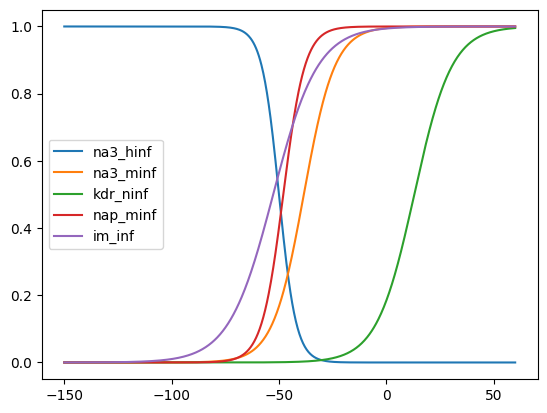

In [2]:
import matplotlib.pyplot as plt

plt.plot(v, na3_hinf, label = 'na3_hinf')
plt.plot(v, na3_minf, label = 'na3_minf')
plt.plot(v, kdr_ninf, label = 'kdr_ninf')
plt.plot(v, nap_minf, label = 'nap_minf')
plt.plot(v, im_inf, label = 'im_inf')
plt.legend()


In [3]:
import os
os.system('nrnivmodl')

/home/mwsrgf/act-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating capool.mod into /home/mwsrgf/proj/ACT/data/Burster_Izhikevich/orig/x86_64/capool.c
Translating im.mod into /home/mwsrgf/proj/ACT/data/Burster_Izhikevich/orig/x86_64/im.c
Thread Safe
Translating kdrca1.mod into /home/mwsrgf/proj/ACT/data/Burster_Izhikevich/orig/x86_64/kdrca1.c
Thread Safe
Notice: Assignment to the GLOBAL variable, "ninf", is not thread safe
Notice: Assignment to the GLOBAL variable, "taun", is not thread safe
Translating leak.mod into /home/mwsrgf/proj/ACT/data/Burster_Izhikevich/orig/x86_64/leak.c
Thread Safe
Translating na3.mod into /home/mwsrgf/proj/ACT/data/Burster_Izhikevich/orig/x86_64/na3.c
Translating nap.mod into /home/mwsrgf/proj/ACT/data/Burster_Izhikevich/orig/x86_64/nap.c
Notice: Assignment to the GLOBAL variable, "htau", is not thread safe
Notice: A

/home/mwsrgf/proj/ACT/data/Burster_Izhikevich/orig
Mod files: "./capool.mod" "./im.mod" "./kdrca1.mod" "./leak.mod" "./na3.mod" "./nap.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../capool.mod
 -> NMODL ../im.mod
 -> NMODL ../kdrca1.mod
 -> NMODL ../leak.mod
 -> NMODL ../na3.mod
 -> NMODL ../nap.mod
 -> Compiling capool.c
 -> Compiling im.c
 -> Compiling kdrca1.c
 -> Compiling leak.c
 -> Compiling na3.c
 -> Compiling nap.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special


0

In [4]:
# Izhikevich p. 307

import matplotlib.pyplot as plt

from neuron import h
h.load_file('stdrun.hoc')

--No graphics will be displayed.


1.0

In [5]:
h.load_file("template.hoc")
cell = h.Burster_Izh()

In [6]:
cell.soma[0](0.5).cm

2.5

In [7]:
# CI
ci = h.IClamp(cell.soma[0](0.5))
ci.amp = 1.8 # (nA)
ci.delay = 50
ci.dur = 150

# V recording
v_orig = h.Vector().record(cell.soma[0](0.5)._ref_v)

In [8]:
h.tstop = 200
h.dt = 0.1
h.steps_per_ms = 1 / h.dt
h.v_init = -50

In [9]:
h.run()

0.0

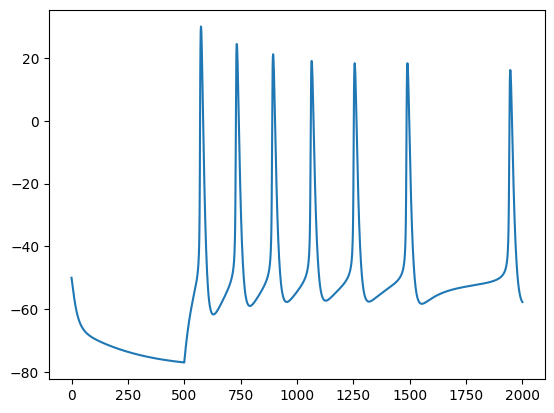

In [10]:
plt.plot(v_orig.as_numpy())